## Imports

In [1]:
import numpy as np

In [2]:
def get_value(line):
    return np.fromstring(line.replace("[", "").replace("]", ""), sep=",")

def read_comparison_logs(file):
    line = file.readline()
    exact_gurobi_utilities = get_value(line)
    line = file.readline()
    exact_gurobi_times = get_value(line)
    line = file.readline()
    exact_gurobi_vcs = get_value(line)
    line = file.readline()
    exact_gurobi_vtcs = get_value(line)
    line = file.readline()
    parallel_gurobi_utilities = get_value(line)
    line = file.readline()
    parallel_gurobi_times = get_value(line)
    line = file.readline()
    parallel_gurobi_vcs = get_value(line)
    line = file.readline()
    parallel_gurobi_vtcs = get_value(line)
    line = file.readline()
    admm_utilities = get_value(line)
    line = file.readline()
    admm_times = get_value(line)
    line = file.readline()
    admm_vcs = get_value(line)
    line = file.readline()
    admm_vtcs = get_value(line)
    return exact_gurobi_utilities, exact_gurobi_times, exact_gurobi_vcs, exact_gurobi_vtcs, parallel_gurobi_utilities, parallel_gurobi_times, parallel_gurobi_vcs, parallel_gurobi_vtcs, admm_utilities, admm_times, admm_vcs, admm_vtcs

# file = open(f"./comparison_logging/remote/comparison_logging/generated", "r") # Generated File
file = open(f"./comparison_logging/remote/comparison_logging/iso_ne", "r") # ISO-NE File
exact_gurobi_utilities, exact_gurobi_times, exact_gurobi_vcs, exact_gurobi_vtcs, parallel_gurobi_utilities, parallel_gurobi_times, parallel_gurobi_vcs, parallel_gurobi_vtcs, admm_utilities, admm_times, admm_vcs, admm_vtcs = read_comparison_logs(file)
file.close()

## Visualize Statistics

In [4]:
# example_sizes = [480, 2400, 4800, 7200, 9600, 12000] # Generated Bid Count
example_sizes = [3505, 7033, 11113, 13635, 14835] # ISO-NE Bid Count

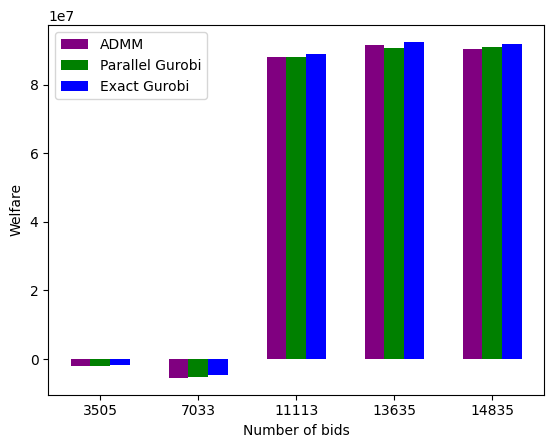

In [5]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.xlabel("Number of bids")
ax.set_xticks(range(len(example_sizes)))
ax.set_xticklabels(example_sizes)
plt.ylabel("Welfare")
plt.bar(np.array(range(len(example_sizes)))-0.2, admm_utilities, color="purple", label="ADMM", width=0.2)
plt.bar(np.array(range(len(example_sizes))), parallel_gurobi_utilities, color="green", label="Parallel Gurobi", width=0.2)
plt.bar(np.array(range(len(example_sizes)))+0.2, exact_gurobi_utilities, color="blue", label="Exact Gurobi", width=0.2)
plt.legend(loc="upper left")
plt.savefig('comparison-welfare.png', dpi=1200, bbox_inches='tight')
plt.show()

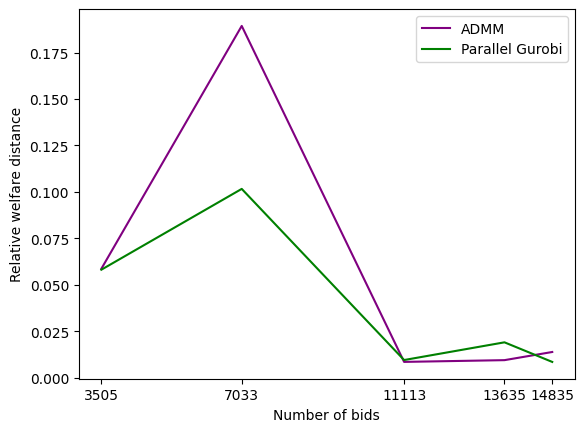

In [7]:
admm_rwd = np.absolute(np.array(admm_utilities) - np.array(exact_gurobi_utilities)) / np.absolute(exact_gurobi_utilities)
parallel_gurobi_rwd = np.absolute(np.array(parallel_gurobi_utilities) - np.array(exact_gurobi_utilities)) / np.absolute(exact_gurobi_utilities)

ax = plt.axes()
plt.xlabel("Number of bids")
plt.ylabel("Relative welfare distance")
ax.set_xticks(example_sizes)
ax.set_xticklabels(example_sizes, rotation=0)
plt.plot(example_sizes, admm_rwd, color="purple", label="ADMM")
plt.plot(example_sizes, parallel_gurobi_rwd, color="green", label="Parallel Gurobi")
plt.legend(loc="upper right")
plt.savefig('comparison-rwd.png', dpi=1200, bbox_inches='tight')
plt.show()

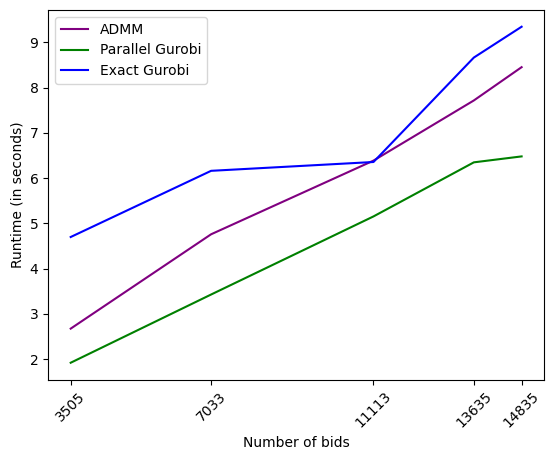

In [8]:
# fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(9, 3), constrained_layout=True)

ax = plt.axes()
plt.xlabel("Number of bids")
plt.ylabel("Runtime (in seconds)")
ax.set_xticks(example_sizes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.plot(example_sizes, admm_times, color="purple", label="ADMM")
plt.plot(example_sizes, parallel_gurobi_times, color="green", label="Parallel Gurobi")
plt.plot(example_sizes, exact_gurobi_times, color="blue", label="Exact Gurobi")
plt.legend(loc="upper left")
plt.savefig('comparison-runtime.png', dpi=1200, bbox_inches='tight')
plt.show()